# Yearly Sales Data Analysis
## This code is for analyzing yearly sales data of a company. The data is in the form of csv files. The data is cleaned and then analyzed to answer the following questions:
### 1. Which month has the highest sales?
### 2. Which city has the highest sales?
### 3. What time should we display advertisements to maximize likelihood of customer's buying product?
### 4. What products are most often sold together?
### 5. What product sold the most? Why do you think it sold the most?

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [314]:
path = 'Sales_Data'

csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

df = pd.DataFrame()

for file in csv_files:
    df = pd.concat([df, pd.read_csv(path+'/'+file)])

df.to_csv('all_sales_data.csv', index=False)

In [315]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,147026,20in Monitor,6,2000000,04/09/23 11:54,"Asia Afrika St, Cirebon, Jawa Barat 90001"
1,147027,34in Ultrawide Monitor,1,6000000,04/22/23 11:26,"Gatot Subroto St, Bandung, Jawa Barat 94016"
2,147028,Lightning Charging Cable,8,30000,04/26/23 10:31,"Asia Tenggara St, Depok, Jawa Barat 73301"
3,147029,USB-C Charging Cable,8,20000,04/28/23 20:20,"H. Agus Salim St, Tangerang, Banten 10001"
4,147030,Apple Airpods Headphones,6,2500000,04/25/23 20:57,"Pahlawan St, Cirebon, Jawa Barat 90001"
...,...,...,...,...,...,...
1995,158628,Lightning Charging Cable,5,30000,09/19/23 14:47,"Pahlawan St, Bandung, Jawa Barat 94016"
1996,158629,ThinkPad Laptop,4,15000000,09/29/23 11:16,"Raden Ajeng Kartini St, Semarang, Jawa Tengah ..."
1997,158630,Macbook Pro Laptop,7,26000000,09/04/23 11:37,"Panglima Polin St, Jakarta, DKI Jakarta 02215"
1998,158631,Apple Airpods Headphones,8,2500000,09/25/23 09:59,"Jend. Sudirman St, Bandung, Jawa Barat 94016"


In [329]:
#df_nan = df[df.isna().any(axis=1)]
df.dropna(inplace=True)

In [330]:
#df_nan
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,147026.0,20in Monitor,6.0,2000000.0,2023-04-09 11:54:00,"Asia Afrika St, Cirebon, Jawa Barat 90001"
1,147027.0,34in Ultrawide Monitor,1.0,6000000.0,2023-04-22 11:26:00,"Gatot Subroto St, Bandung, Jawa Barat 94016"
2,147028.0,Lightning Charging Cable,8.0,30000.0,2023-04-26 10:31:00,"Asia Tenggara St, Depok, Jawa Barat 73301"
3,147029.0,USB-C Charging Cable,8.0,20000.0,2023-04-28 20:20:00,"H. Agus Salim St, Tangerang, Banten 10001"
4,147030.0,Apple Airpods Headphones,6.0,2500000.0,2023-04-25 20:57:00,"Pahlawan St, Cirebon, Jawa Barat 90001"
...,...,...,...,...,...,...
1995,158628.0,Lightning Charging Cable,5.0,30000.0,2023-09-19 14:47:00,"Pahlawan St, Bandung, Jawa Barat 94016"
1996,158629.0,ThinkPad Laptop,4.0,15000000.0,2023-09-29 11:16:00,"Raden Ajeng Kartini St, Semarang, Jawa Tengah ..."
1997,158630.0,Macbook Pro Laptop,7.0,26000000.0,2023-09-04 11:37:00,"Panglima Polin St, Jakarta, DKI Jakarta 02215"
1998,158631.0,Apple Airpods Headphones,8.0,2500000.0,2023-09-25 09:59:00,"Jend. Sudirman St, Bandung, Jawa Barat 94016"


In [318]:
#df = df.loc[:, ['Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']] = df.loc[:, ['Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']].fillna({'Product': 'Unknown', 'Quantity_Ordered': 0, 'Price_Each': 0, 'Order_Date': 'Unknown', 'Purchase_Address': 'Unknown'})


In [319]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,147026,20in Monitor,6,2000000,04/09/23 11:54,"Asia Afrika St, Cirebon, Jawa Barat 90001"
1,147027,34in Ultrawide Monitor,1,6000000,04/22/23 11:26,"Gatot Subroto St, Bandung, Jawa Barat 94016"
2,147028,Lightning Charging Cable,8,30000,04/26/23 10:31,"Asia Tenggara St, Depok, Jawa Barat 73301"
3,147029,USB-C Charging Cable,8,20000,04/28/23 20:20,"H. Agus Salim St, Tangerang, Banten 10001"
4,147030,Apple Airpods Headphones,6,2500000,04/25/23 20:57,"Pahlawan St, Cirebon, Jawa Barat 90001"
...,...,...,...,...,...,...
1995,158628,Lightning Charging Cable,5,30000,09/19/23 14:47,"Pahlawan St, Bandung, Jawa Barat 94016"
1996,158629,ThinkPad Laptop,4,15000000,09/29/23 11:16,"Raden Ajeng Kartini St, Semarang, Jawa Tengah ..."
1997,158630,Macbook Pro Laptop,7,26000000,09/04/23 11:37,"Panglima Polin St, Jakarta, DKI Jakarta 02215"
1998,158631,Apple Airpods Headphones,8,2500000,09/25/23 09:59,"Jend. Sudirman St, Bandung, Jawa Barat 94016"


In [320]:
print(df.dtypes)

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object


### Try this method for converting the data type

In [321]:
try:
    df['Quantity_Ordered'] = df['Quantity_Ordered'].astype('int64')
except ValueError as e:
    print("Error converting 'Quantity_Ordered':", e)

try:
    df['Price_Each'] = df['Price_Each'].astype('float64')
except ValueError as e:
    print("Error converting 'Price_Each':", e)

try:
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
except ValueError as e:
    print("Error converting 'Order_Date':", e)

print(df.dtypes)

Error converting 'Quantity_Ordered': invalid literal for int() with base 10: 'Quantity_Ordered'
Error converting 'Price_Each': could not convert string to float: 'Price_Each'
Error converting 'Order_Date': Unknown datetime string format, unable to parse: Order_Date, at position 544
Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object


C:\Users\adhya\AppData\Local\Temp\ipykernel_23892\138624221.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


### There was an error so I'm going to use another method for conversion

In [331]:
# Clean 'Quantity_Ordered' column
df['Quantity_Ordered'] = pd.to_numeric(df['Quantity_Ordered'], errors='coerce')

# Clean 'Price_Each' column
df['Price_Each'] = pd.to_numeric(df['Price_Each'], errors='coerce')

df['Order_ID'] = pd.to_numeric(df['Order_ID'], errors='coerce')

In [332]:
# Clean 'Order_Date' column
df.loc[:, 'Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%y %H:%M', errors='coerce')


In [333]:
print(df.dtypes)

Order_ID            float64
Product              object
Quantity_Ordered    float64
Price_Each          float64
Order_Date           object
Purchase_Address     object
dtype: object


In [334]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,147026.0,20in Monitor,6.0,2000000.0,2023-04-09 11:54:00,"Asia Afrika St, Cirebon, Jawa Barat 90001"
1,147027.0,34in Ultrawide Monitor,1.0,6000000.0,2023-04-22 11:26:00,"Gatot Subroto St, Bandung, Jawa Barat 94016"
2,147028.0,Lightning Charging Cable,8.0,30000.0,2023-04-26 10:31:00,"Asia Tenggara St, Depok, Jawa Barat 73301"
3,147029.0,USB-C Charging Cable,8.0,20000.0,2023-04-28 20:20:00,"H. Agus Salim St, Tangerang, Banten 10001"
4,147030.0,Apple Airpods Headphones,6.0,2500000.0,2023-04-25 20:57:00,"Pahlawan St, Cirebon, Jawa Barat 90001"
...,...,...,...,...,...,...
1995,158628.0,Lightning Charging Cable,5.0,30000.0,2023-09-19 14:47:00,"Pahlawan St, Bandung, Jawa Barat 94016"
1996,158629.0,ThinkPad Laptop,4.0,15000000.0,2023-09-29 11:16:00,"Raden Ajeng Kartini St, Semarang, Jawa Tengah ..."
1997,158630.0,Macbook Pro Laptop,7.0,26000000.0,2023-09-04 11:37:00,"Panglima Polin St, Jakarta, DKI Jakarta 02215"
1998,158631.0,Apple Airpods Headphones,8.0,2500000.0,2023-09-25 09:59:00,"Jend. Sudirman St, Bandung, Jawa Barat 94016"


In [335]:
df_nan = df[df.isna().any(axis=1)]
df_nan

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address


In [336]:
def get_city(address):
    return address.split(',')[1].strip(' ')

df['City'] = df['Purchase_Address'].apply(lambda x: get_city(x))
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City
0,147026.0,20in Monitor,6.0,2000000.0,2023-04-09 11:54:00,"Asia Afrika St, Cirebon, Jawa Barat 90001",Cirebon
1,147027.0,34in Ultrawide Monitor,1.0,6000000.0,2023-04-22 11:26:00,"Gatot Subroto St, Bandung, Jawa Barat 94016",Bandung
2,147028.0,Lightning Charging Cable,8.0,30000.0,2023-04-26 10:31:00,"Asia Tenggara St, Depok, Jawa Barat 73301",Depok
3,147029.0,USB-C Charging Cable,8.0,20000.0,2023-04-28 20:20:00,"H. Agus Salim St, Tangerang, Banten 10001",Tangerang
4,147030.0,Apple Airpods Headphones,6.0,2500000.0,2023-04-25 20:57:00,"Pahlawan St, Cirebon, Jawa Barat 90001",Cirebon


In [338]:
df['Month'] = pd.to_datetime(df['Order_Date']).dt.month

In [337]:
df['Sales'] = df['Quantity_Ordered'].astype('float') * df['Price_Each'].astype('float')

In [339]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,Sales,Month
0,147026.0,20in Monitor,6.0,2000000.0,2023-04-09 11:54:00,"Asia Afrika St, Cirebon, Jawa Barat 90001",Cirebon,12000000.0,4
1,147027.0,34in Ultrawide Monitor,1.0,6000000.0,2023-04-22 11:26:00,"Gatot Subroto St, Bandung, Jawa Barat 94016",Bandung,6000000.0,4
2,147028.0,Lightning Charging Cable,8.0,30000.0,2023-04-26 10:31:00,"Asia Tenggara St, Depok, Jawa Barat 73301",Depok,240000.0,4
3,147029.0,USB-C Charging Cable,8.0,20000.0,2023-04-28 20:20:00,"H. Agus Salim St, Tangerang, Banten 10001",Tangerang,160000.0,4
4,147030.0,Apple Airpods Headphones,6.0,2500000.0,2023-04-25 20:57:00,"Pahlawan St, Cirebon, Jawa Barat 90001",Cirebon,15000000.0,4
...,...,...,...,...,...,...,...,...,...
1995,158628.0,Lightning Charging Cable,5.0,30000.0,2023-09-19 14:47:00,"Pahlawan St, Bandung, Jawa Barat 94016",Bandung,150000.0,9
1996,158629.0,ThinkPad Laptop,4.0,15000000.0,2023-09-29 11:16:00,"Raden Ajeng Kartini St, Semarang, Jawa Tengah ...",Semarang,60000000.0,9
1997,158630.0,Macbook Pro Laptop,7.0,26000000.0,2023-09-04 11:37:00,"Panglima Polin St, Jakarta, DKI Jakarta 02215",Jakarta,182000000.0,9
1998,158631.0,Apple Airpods Headphones,8.0,2500000.0,2023-09-25 09:59:00,"Jend. Sudirman St, Bandung, Jawa Barat 94016",Bandung,20000000.0,9


In [340]:
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

Month
1     3.757589e+10
2     3.830263e+10
3     3.769336e+10
4     3.765927e+10
5     3.697884e+10
6     3.685618e+10
7     3.785358e+10
8     3.788662e+10
9     4.105227e+10
10    3.319398e+10
11    3.466967e+10
12    3.734716e+10
Name: Sales, dtype: float64


In [341]:
sorted_monthly_sales = monthly_sales.sort_values(ascending=False)
sorted_monthly_sales

Month
9     4.105227e+10
2     3.830263e+10
8     3.788662e+10
7     3.785358e+10
3     3.769336e+10
4     3.765927e+10
1     3.757589e+10
12    3.734716e+10
5     3.697884e+10
6     3.685618e+10
11    3.466967e+10
10    3.319398e+10
Name: Sales, dtype: float64

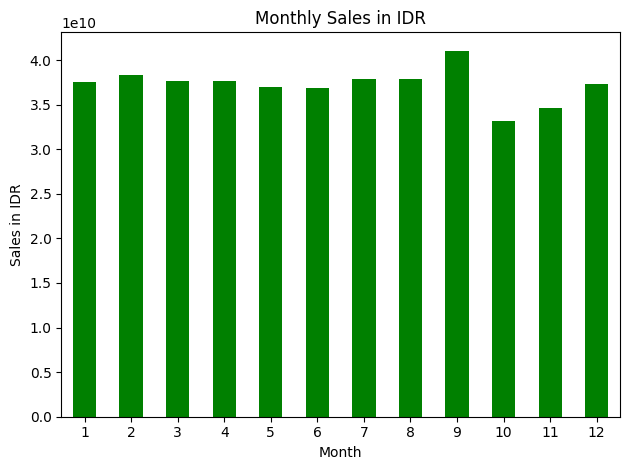

In [342]:
monthly_sales.plot(kind='bar', color='green')
plt.xlabel('Month')
plt.ylabel('Sales in IDR')
plt.title('Monthly Sales in IDR')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [343]:
city_sales = df.groupby('City')['Sales'].sum()
city_sales

City
Bandung       1.057049e+11
Bekasi        3.662295e+10
Bogor         3.577770e+10
Cirebon       7.593489e+10
Depok         2.134253e+10
Jakarta       4.706254e+10
Semarang      3.579317e+10
Surabaya      2.580194e+10
Tangerang     5.656098e+10
Yogyakarta    6.467840e+09
Name: Sales, dtype: float64

In [344]:
sorted_city_sales = city_sales.sort_values(ascending=False)
print(sorted_city_sales)

City
Bandung       1.057049e+11
Cirebon       7.593489e+10
Tangerang     5.656098e+10
Jakarta       4.706254e+10
Bekasi        3.662295e+10
Semarang      3.579317e+10
Bogor         3.577770e+10
Surabaya      2.580194e+10
Depok         2.134253e+10
Yogyakarta    6.467840e+09
Name: Sales, dtype: float64


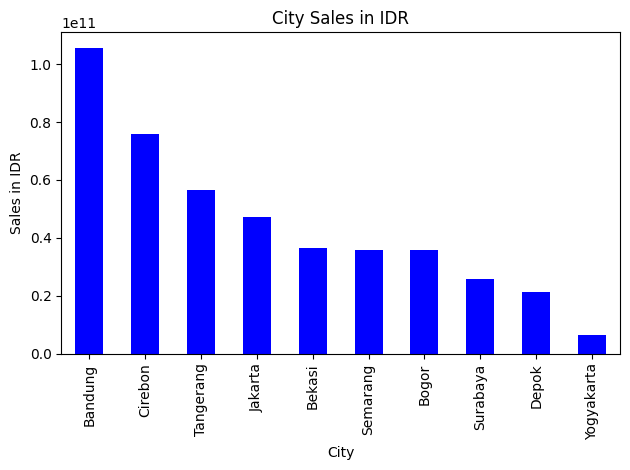

In [345]:
sorted_city_sales.plot(kind='bar', color='blue')
plt.xlabel('City')
plt.ylabel('Sales in IDR')
plt.title('City Sales in IDR')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [348]:
# Convert 'Order_Date' to datetime type
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract relevant time-based features
df['Hour'] = df['Order_Date'].dt.hour
df['DayOfWeek'] = df['Order_Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Order_Date'].dt.month

In [349]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,Sales,Month,Hour,DayOfWeek
0,147026.0,20in Monitor,6.0,2000000.0,2023-04-09 11:54:00,"Asia Afrika St, Cirebon, Jawa Barat 90001",Cirebon,12000000.0,4,11,6
1,147027.0,34in Ultrawide Monitor,1.0,6000000.0,2023-04-22 11:26:00,"Gatot Subroto St, Bandung, Jawa Barat 94016",Bandung,6000000.0,4,11,5
2,147028.0,Lightning Charging Cable,8.0,30000.0,2023-04-26 10:31:00,"Asia Tenggara St, Depok, Jawa Barat 73301",Depok,240000.0,4,10,2
3,147029.0,USB-C Charging Cable,8.0,20000.0,2023-04-28 20:20:00,"H. Agus Salim St, Tangerang, Banten 10001",Tangerang,160000.0,4,20,4
4,147030.0,Apple Airpods Headphones,6.0,2500000.0,2023-04-25 20:57:00,"Pahlawan St, Cirebon, Jawa Barat 90001",Cirebon,15000000.0,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,158628.0,Lightning Charging Cable,5.0,30000.0,2023-09-19 14:47:00,"Pahlawan St, Bandung, Jawa Barat 94016",Bandung,150000.0,9,14,1
1996,158629.0,ThinkPad Laptop,4.0,15000000.0,2023-09-29 11:16:00,"Raden Ajeng Kartini St, Semarang, Jawa Tengah ...",Semarang,60000000.0,9,11,4
1997,158630.0,Macbook Pro Laptop,7.0,26000000.0,2023-09-04 11:37:00,"Panglima Polin St, Jakarta, DKI Jakarta 02215",Jakarta,182000000.0,9,11,0
1998,158631.0,Apple Airpods Headphones,8.0,2500000.0,2023-09-25 09:59:00,"Jend. Sudirman St, Bandung, Jawa Barat 94016",Bandung,20000000.0,9,9,0


In [350]:
hourly_sales = df.groupby('Hour')['Sales'].sum()
hourly_sales

Hour
0     1.013922e+10
1     6.031628e+09
2     3.679630e+09
3     1.661690e+09
4     1.791738e+09
5     4.056264e+09
6     6.017248e+09
7     8.801018e+09
8     1.529906e+10
9     1.882716e+10
10    2.528806e+10
11    2.861236e+10
12    3.073707e+10
13    2.877322e+10
14    2.851633e+10
15    2.304166e+10
16    2.446175e+10
17    2.748179e+10
18    2.881658e+10
19    3.362843e+10
20    3.026614e+10
21    2.593803e+10
22    2.290794e+10
23    1.229544e+10
Name: Sales, dtype: float64

In [351]:
sorted_hourly_sales = hourly_sales.sort_values(ascending=False)
sorted_hourly_sales

Hour
19    3.362843e+10
12    3.073707e+10
20    3.026614e+10
18    2.881658e+10
13    2.877322e+10
11    2.861236e+10
14    2.851633e+10
17    2.748179e+10
21    2.593803e+10
10    2.528806e+10
16    2.446175e+10
15    2.304166e+10
22    2.290794e+10
9     1.882716e+10
8     1.529906e+10
23    1.229544e+10
0     1.013922e+10
7     8.801018e+09
1     6.031628e+09
6     6.017248e+09
5     4.056264e+09
2     3.679630e+09
4     1.791738e+09
3     1.661690e+09
Name: Sales, dtype: float64

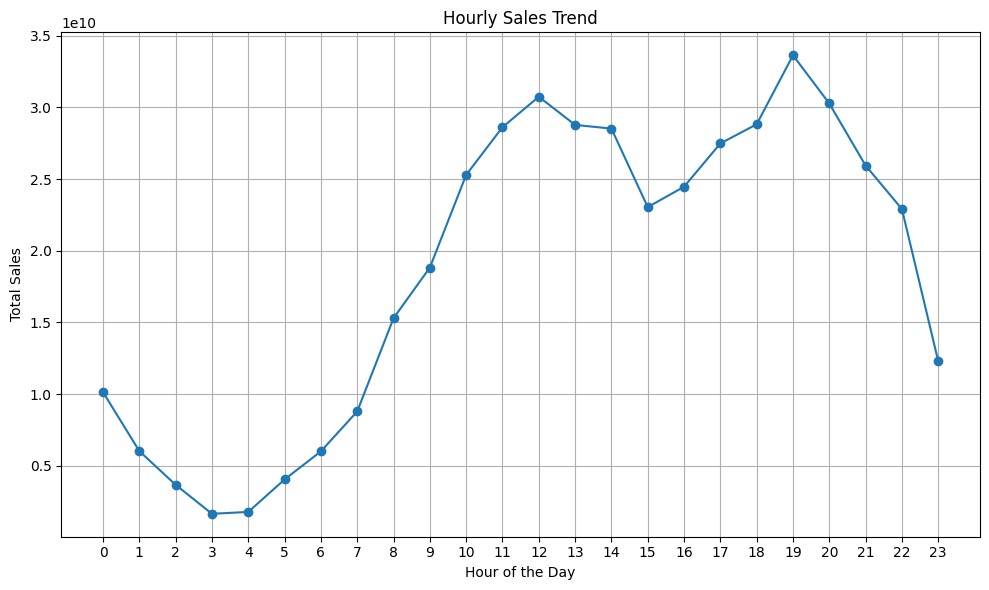

In [352]:
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Hourly Sales Trend')
plt.xticks(range(24))
plt.grid()
plt.tight_layout()
plt.show()

In [353]:
from scipy.stats import ttest_ind

morning_sales = df[(df['Hour'] >= 8) & (df['Hour'] <= 12)]['Sales']
afternoon_sales = df[(df['Hour'] >= 13) & (df['Hour'] <= 17)]['Sales']
t_stat, p_value = ttest_ind(morning_sales, afternoon_sales)

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Determine if the difference is statistically significant (using a significance level of 0.05)
if p_value < 0.05:
    print("Statistically significant difference")
else:
    print("No statistically significant difference")

T-Statistic: -0.8294784173251908
P-Value: 0.40684834706824247
No statistically significant difference


In [354]:
df1 = df[df['Order_ID'].duplicated(keep=False)]
df1['Grouped'] = df1.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))
df2 = df1[['Order_ID', 'Grouped']].drop_duplicates()

df2

C:\Users\adhya\AppData\Local\Temp\ipykernel_23892\1262350166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))


,Order_ID,Grouped
25,147050.0,"AAA Batteries (4-pack),AAA Batteries (4-pack)"
43,147067.0,"iPhone,Lightning Charging Cable"
49,147072.0,"Lightning Charging Cable,AAA Batteries (4-pack)"
79,147101.0,"20in Monitor,Lightning Charging Cable"
142,147163.0,"iPhone,Lightning Charging Cable"
...,...,...
1877,158515.0,"iPhone,Apple Airpods Headphones"
1879,158516.0,"iPhone,Apple Airpods Headphones"
1885,158521.0,"Macbook Pro Laptop,Lightning Charging Cable"
1887,158522.0,"AA Batteries (4-pack),Google Pixel"


In [355]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 129
('iPhone', 'Wired Headphones') 67
('iPhone', 'Apple Airpods Headphones') 43
('Lightning Charging Cable', 'Apple Airpods Headphones') 15
('AAA Batteries (4-pack)', 'Wired Headphones') 12
('Lightning Charging Cable', 'Wired Headphones') 11
('AA Batteries (4-pack)', 'Lightning Charging Cable') 11
('Lightning Charging Cable', 'AAA Batteries (4-pack)') 9
('Lightning Charging Cable', 'AA Batteries (4-pack)') 9
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 8


In [356]:
# Group by 'Product' and calculate the total quantity ordered
product_sales = df.groupby('Product')['Quantity_Ordered'].sum()

# Find the most sold product
most_sold_product = product_sales.idxmax()
total_quantity_sold = product_sales.max()

# Print the most sold product and its total quantity sold
print("Most Sold Product:", most_sold_product)
print("Total Quantity Sold:", total_quantity_sold)

Most Sold Product: Lightning Charging Cable
Total Quantity Sold: 15560.0


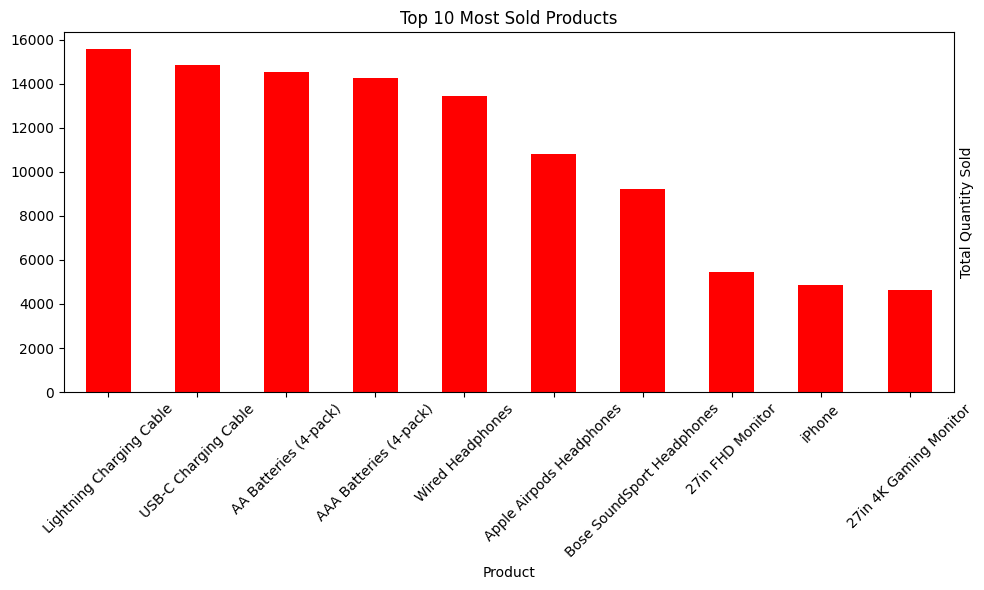

In [357]:
# Sort products by sales quantity in descending order
sorted_products = product_sales.sort_values(ascending=False)

# Choose the top N products to visualize
top_n = 10
top_products = sorted_products.head(top_n)

# Create a bar graph for the top products
fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_label_position("right")
top_products.plot(kind='bar', color='red')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title(f'Top {top_n} Most Sold Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

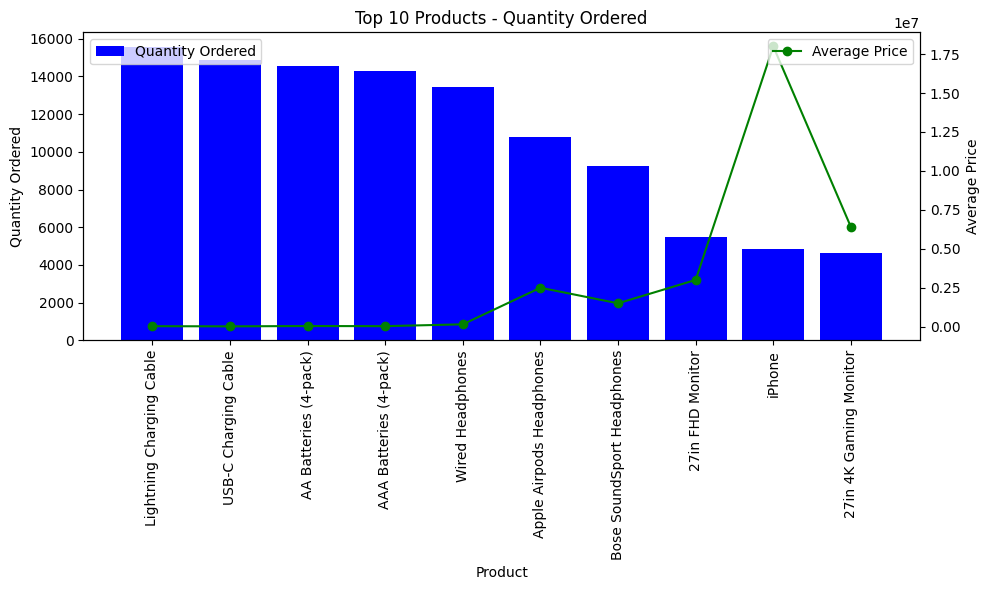

In [358]:
# Group by 'Product' and calculate the total quantity ordered and average price
product_stats = df.groupby('Product').agg({'Quantity_Ordered': 'sum', 'Price_Each': 'mean'})

# Create a single graph with bar and line plots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for quantity ordered
ax1.bar(top_products.index, top_products, color='blue', label='Quantity Ordered')
ax1.set_ylabel('Quantity Ordered')
ax1.set_xlabel('Product')
ax1.set_title(f'Top {top_n} Products - Quantity Ordered')
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

# Create a twin Axes sharing the xaxis for the line plot of average price
ax2 = ax1.twinx()
ax2.plot(product_stats.loc[top_products.index, 'Price_Each'], color='green', marker='o', label='Average Price')
ax2.set_ylabel('Average Price')
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

In [359]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,Sales,Month,Hour,DayOfWeek
0,147026.0,20in Monitor,6.0,2000000.0,2023-04-09 11:54:00,"Asia Afrika St, Cirebon, Jawa Barat 90001",Cirebon,12000000.0,4,11,6
1,147027.0,34in Ultrawide Monitor,1.0,6000000.0,2023-04-22 11:26:00,"Gatot Subroto St, Bandung, Jawa Barat 94016",Bandung,6000000.0,4,11,5
2,147028.0,Lightning Charging Cable,8.0,30000.0,2023-04-26 10:31:00,"Asia Tenggara St, Depok, Jawa Barat 73301",Depok,240000.0,4,10,2
3,147029.0,USB-C Charging Cable,8.0,20000.0,2023-04-28 20:20:00,"H. Agus Salim St, Tangerang, Banten 10001",Tangerang,160000.0,4,20,4
4,147030.0,Apple Airpods Headphones,6.0,2500000.0,2023-04-25 20:57:00,"Pahlawan St, Cirebon, Jawa Barat 90001",Cirebon,15000000.0,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,158628.0,Lightning Charging Cable,5.0,30000.0,2023-09-19 14:47:00,"Pahlawan St, Bandung, Jawa Barat 94016",Bandung,150000.0,9,14,1
1996,158629.0,ThinkPad Laptop,4.0,15000000.0,2023-09-29 11:16:00,"Raden Ajeng Kartini St, Semarang, Jawa Tengah ...",Semarang,60000000.0,9,11,4
1997,158630.0,Macbook Pro Laptop,7.0,26000000.0,2023-09-04 11:37:00,"Panglima Polin St, Jakarta, DKI Jakarta 02215",Jakarta,182000000.0,9,11,0
1998,158631.0,Apple Airpods Headphones,8.0,2500000.0,2023-09-25 09:59:00,"Jend. Sudirman St, Bandung, Jawa Barat 94016",Bandung,20000000.0,9,9,0


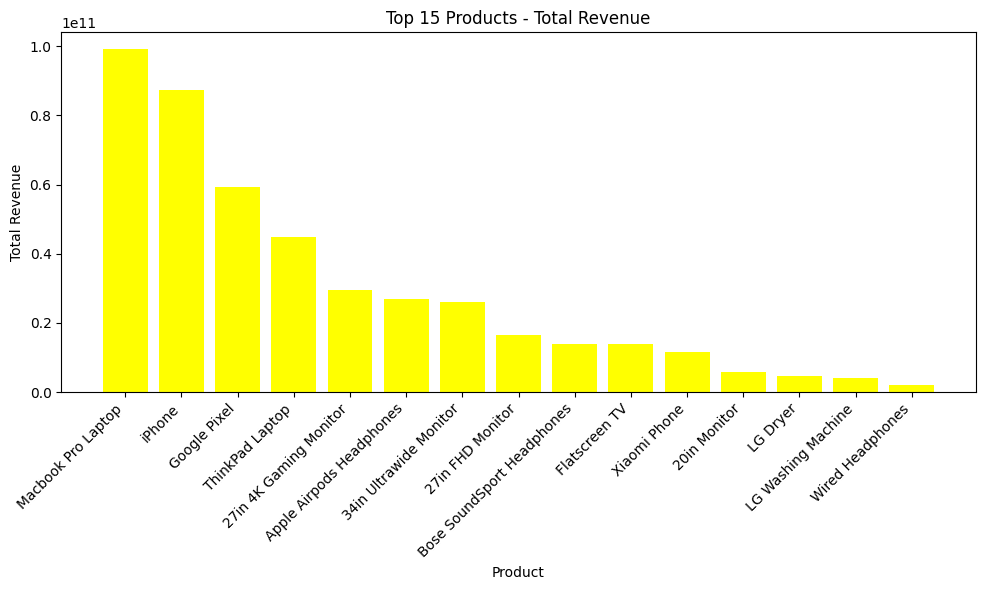

In [360]:
# Calculate total revenue for each product
product_revenue = df.groupby('Product').agg({'Quantity_Ordered': 'sum', 'Price_Each': 'mean'}).reset_index()
product_revenue['Total_Revenue'] = product_revenue['Quantity_Ordered'] * product_revenue['Price_Each']

# Sort products by total revenue in descending order
product_revenue = product_revenue.sort_values(by='Total_Revenue', ascending=False)

# Select top N products for visualization
top_n = 15
top_products = product_revenue.head(top_n)

# Create a bar plot to visualize top-selling products by revenue
plt.figure(figsize=(10, 6))
plt.bar(top_products['Product'], top_products['Total_Revenue'], color='yellow')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title(f'Top {top_n} Products - Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

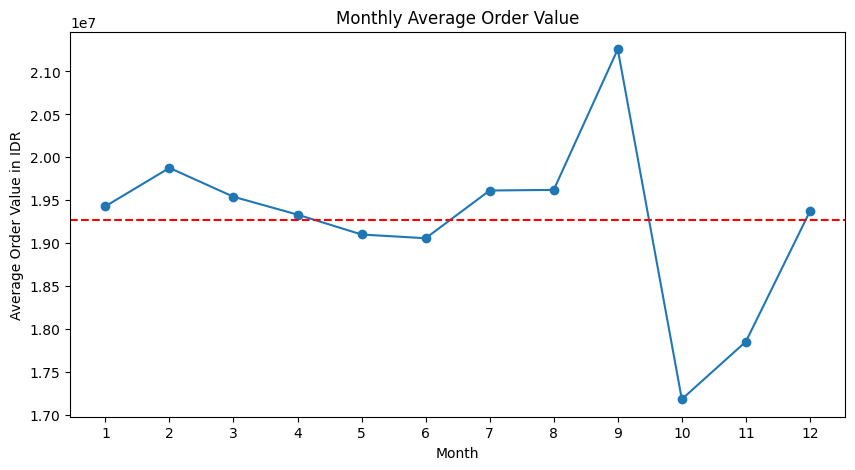

In [361]:
total_revenue = df['Sales'].sum()
total_orders = df['Order_ID'].nunique()

average_order_value = total_revenue / total_orders

monthly_aov = df.groupby('Month')['Sales'].sum() / df.groupby('Month')['Order_ID'].nunique()

plt.figure(figsize=(10, 5))
plt.plot(monthly_aov, marker='o')
plt.axhline(average_order_value, color='red', linestyle='--')
plt.title('Monthly Average Order Value')
plt.xlabel('Month')
plt.ylabel('Average Order Value in IDR')
plt.xticks(monthly_aov.index)
plt.show()

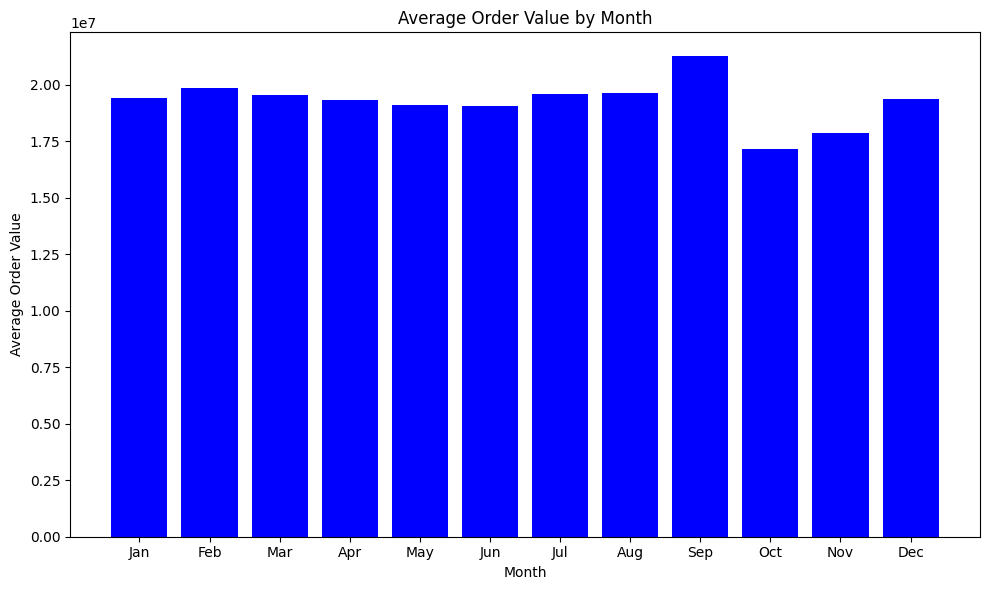

In [362]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_aov.index, monthly_aov.values, color='blue')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Month')
plt.xticks(monthly_aov.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

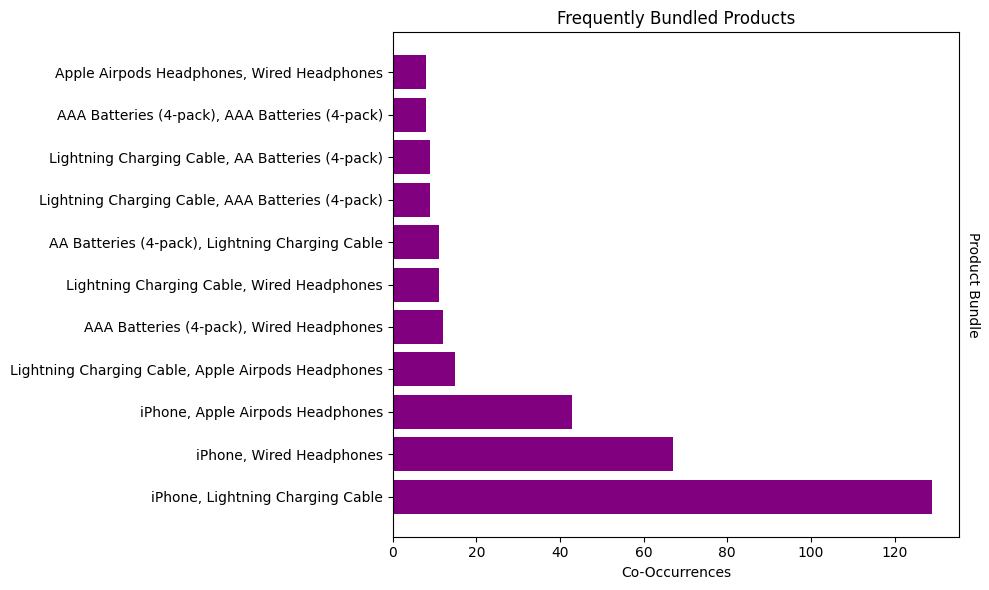

In [363]:
import itertools

# Group by Order_ID and create a list of products in each order
order_product_lists = df.groupby('Order_ID')['Product'].apply(list).tolist()

# Initialize a dictionary to store product co-occurrence counts
product_co_occurrences = {}

# Iterate through order product lists and update co-occurrence counts
for order_products in order_product_lists:
    # Generate all possible pairs of products in the order
    product_pairs = list(itertools.combinations(order_products, 2))
    
    # Update co-occurrence counts in the dictionary
    for pair in product_pairs:
        if pair in product_co_occurrences:
            product_co_occurrences[pair] += 1
        else:
            product_co_occurrences[pair] = 1

# Convert the dictionary to a DataFrame
bundle_df = pd.DataFrame(list(product_co_occurrences.items()), columns=['Bundle', 'Co-Occurrences'])

# Filter bundles with a minimum co-occurrence threshold
min_co_occurrences = 8
bundle_df = bundle_df[bundle_df['Co-Occurrences'] >= min_co_occurrences]

# Sort bundles by co-occurrence count
bundle_df = bundle_df.sort_values(by='Co-Occurrences', ascending=False)

# Visualize the top bundles
fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_label_position("right")

plt.barh(bundle_df['Bundle'].apply(lambda x: ', '.join(x)), bundle_df['Co-Occurrences'], color='purple')
plt.xlabel('Co-Occurrences')
plt.ylabel('Product Bundle', rotation=270, labelpad=15)
plt.title('Frequently Bundled Products')
plt.tight_layout()

plt.show()